# **DAV ASSIGNMENT 4**
Dipean Dasgupta
202151188




**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Connecting to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Data

In [ ]:
DS1=pd.read_csv('/content/drive/MyDrive/CS312_DA/Egg_Production_2007_2012.csv')
DS2=pd.read_csv('/content/drive/MyDrive/CS312_DA/Milk_Production_2007_2012.csv')

In [ ]:
DS1.head()

,States/Uts,2007-08 (In lakh nos.),2008-09 (In lakh nos.),2009-10 (In lakh nos.),2010-11 (In lakh nos.),2011-12 (In lakh nos.)
0,Andhra Pradesh,175884,183446,193958,201277,212103
1,Arunachal Pradesh,394,361,380,407,419
2,Assam,4910,4659,4671,4707,4705
3,Bihar,10707,10740,11002,7446,7552
4,Chhattisgarh,9184,9738,10520,12454,12984


In [ ]:
DS2.head()

,States/Uts,2007-08,2008-09,2009-10,2010-11,2011-12
0,Andhra Pradesh,8925,9570,10429,11203,12088
1,Arunachal Pradesh,32,24,26,28,22
2,Assam,752,753,756,790,796
3,Bihar,5783,5934,6124,6517,6643
4,Chhattisgarh,866,908,956,1029,1119


**TASK1:Merge two data frames such that the new data frame has multi-level columns (like years under milk and eggs). Try to change the column names if required.**

In [ ]:
eg_df=pd.DataFrame(DS1)
mk_df=pd.DataFrame(DS2)


In [ ]:
# Merge the dataframes
egmk_df = pd.merge(eg_df, mk_df, on='States/Uts', suffixes=('_eggs', '_milk'))

print(egmk_df)

                   States/Uts  2007-08 (In lakh nos.)  2008-09 (In lakh nos.)  \
0              Andhra Pradesh                  175884                  183446   
1           Arunachal Pradesh                     394                     361   
2                       Assam                    4910                    4659   
3                       Bihar                   10707                   10740   
4                Chhattisgarh                    9184                    9738   
5                         Goa                     152                     149   
6                     Gujarat                    8256                   12675   
7                     Haryana                   41031                   38150   
8            Himachal Pradesh                     843                     977   
9             Jammu & Kashmir                    6682                    7208   
10                  Jharkhand                    7130                    3995   
11                  Karnatak

In [ ]:
egmk_df.head()

,States/Uts,2007-08 (In lakh nos.),2008-09 (In lakh nos.),2009-10 (In lakh nos.),2010-11 (In lakh nos.),2011-12 (In lakh nos.),2007-08,2008-09,2009-10,2010-11,2011-12
0,Andhra Pradesh,175884,183446,193958,201277,212103,8925,9570,10429,11203,12088
1,Arunachal Pradesh,394,361,380,407,419,32,24,26,28,22
2,Assam,4910,4659,4671,4707,4705,752,753,756,790,796
3,Bihar,10707,10740,11002,7446,7552,5783,5934,6124,6517,6643
4,Chhattisgarh,9184,9738,10520,12454,12984,866,908,956,1029,1119


**TASK2:Present the production of milk in Gujarat, Kerala, Andhra Pradesh, Uttar Pradesh and Punjab on 2007-2008 as a Pie chart. The pie chart should consist of proportion in percentage and labels for each piece**

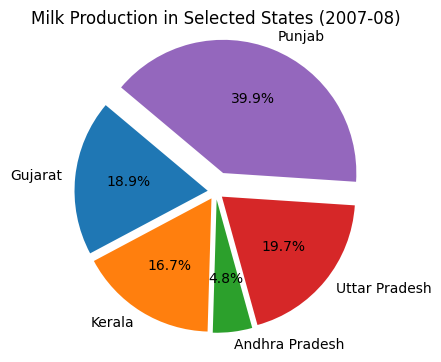

In [ ]:
states_select = ['Gujarat', 'Kerala', 'Andhra Pradesh', 'Uttar Pradesh', 'Punjab']
year = '2007-08'

selected_data = mk_df[mk_df['States/Uts'].isin(states_select)][year]
explode=[0.06,0.06,0.06,0.06,0.15]
# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(selected_data, labels=states_select, autopct='%1.1f%%', startangle=140,explode=explode)
plt.title('Milk Production in Selected States (2007-08)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**TASK3:Plot five pie charts of egg production in Gujarat, Kerala, Andhra Pradesh, Uttar Pradesh and Punjab for the five years range. Each pie chart should represent the proportional egg production in Gujarat, Kerala, Andhra Pradesh, Uttar Pradesh and Punjab for a given year.**

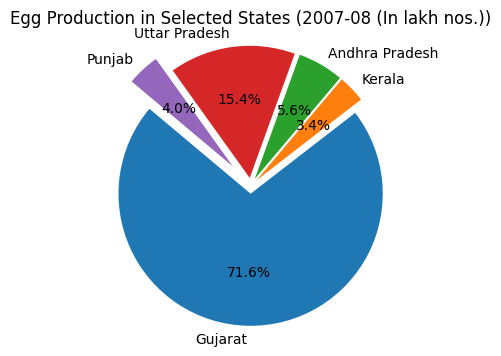

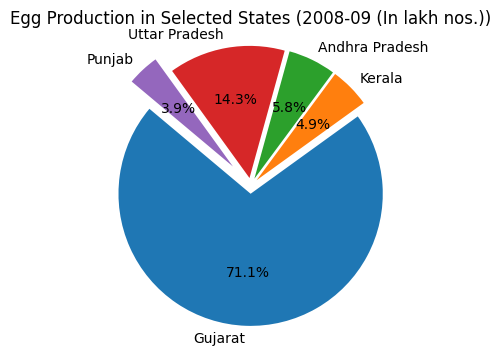

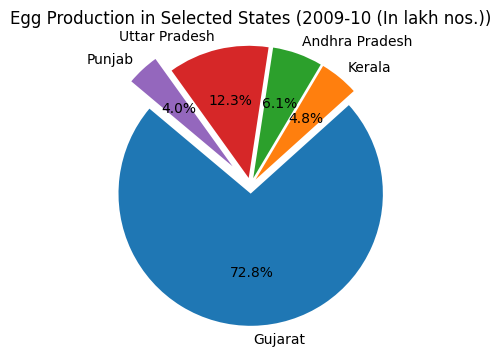

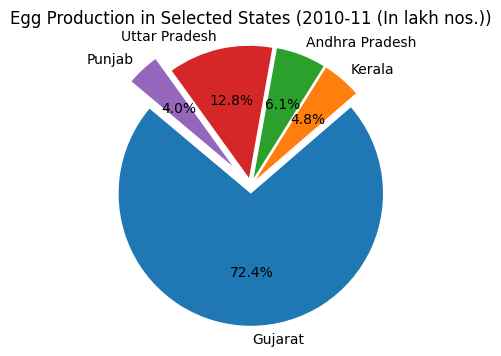

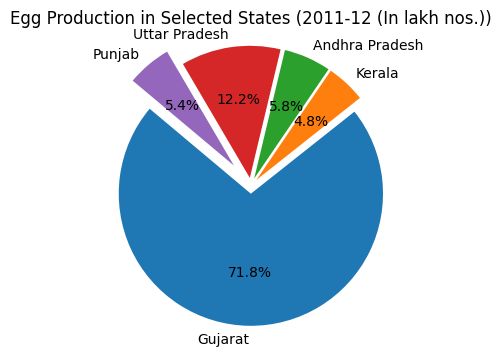

In [ ]:
select_state = ['Gujarat', 'Kerala', 'Andhra Pradesh', 'Uttar Pradesh', 'Punjab']

# Create pie charts for each year
for year in eg_df.columns[1:]:
    egg_production = eg_df.loc[eg_df['States/Uts'].isin(select_state), year]

    explode=[0.06,0.06,0.06,0.06,0.2]

    plt.figure(figsize=(4, 4))
    plt.pie(egg_production, labels=select_state, autopct='%1.1f%%', startangle=140,explode=explode)
    plt.title(f'Egg Production in Selected States ({year})')
    plt.axis('equal')
    plt.show()

**TASK4:Plot Stacked Area Chart that represents the proportional egg production state wise over five years. There would be five stacked colors for Gujarat, Kerala, Andhra Pradesh, Uttar Pradesh and Punjab.**

*State_Wise*

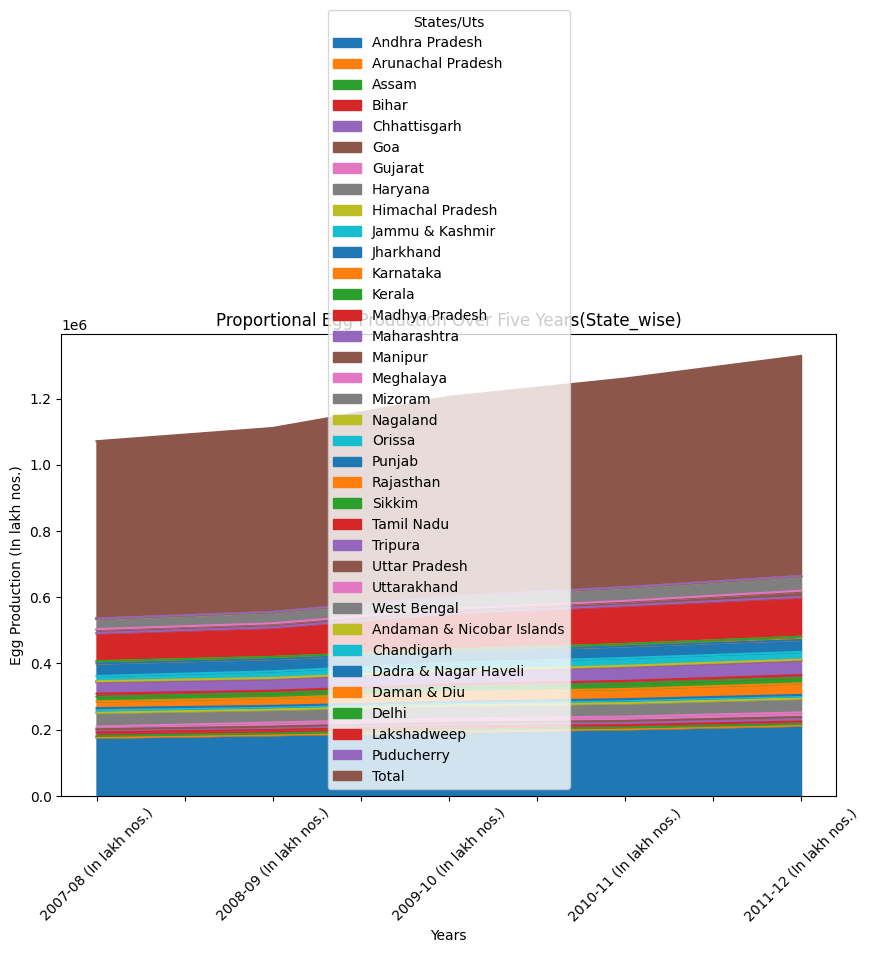

In [ ]:
egs_df = pd.DataFrame(DS1)

# Set 'States/Uts' column as the index for easier plotting
egs_df.set_index('States/Uts', inplace=True)

# Plot stacked area chart
egs_df.T.plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Proportional Egg Production Over Five Years(State_wise)')
plt.xlabel('Years')
plt.ylabel('Egg Production (In lakh nos.)')
plt.xticks(rotation=45)
plt.legend(title='States/Uts')
plt.show()

*For the specific 5 states*

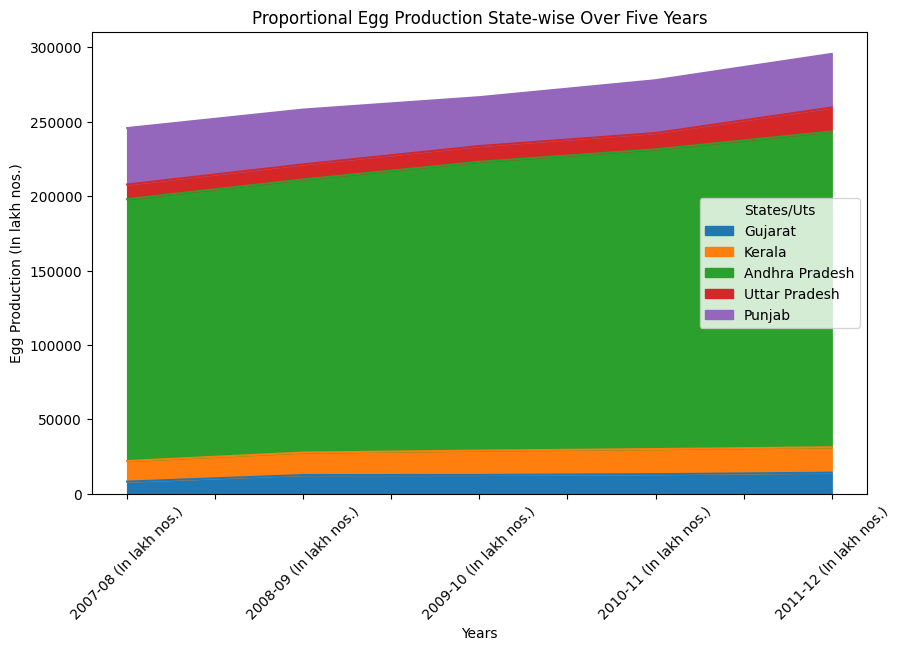

In [ ]:
eggs_df = pd.DataFrame(DS1)

eggs_df.set_index('States/Uts', inplace=True)

# Filter the dataframe for the specified states
selected_states = ['Gujarat', 'Kerala', 'Andhra Pradesh', 'Uttar Pradesh', 'Punjab']
eggs_df = eggs_df.loc[selected_states]

# Plot stacked area chart
eggs_df.T.plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Proportional Egg Production State-wise Over Five Years')
plt.xlabel('Years')
plt.ylabel('Egg Production (In lakh nos.)')
plt.xticks(rotation=45)
plt.legend(title='States/Uts')
plt.show()